# **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install tensorflow
!pip install keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# **AQI Calculation**

In [ ]:
# Step 1: Load Dataset
df = pd.read_csv('/content/AQI_Dhaka.csv', parse_dates=['date'], index_col='date',
                 date_format='%d-%m-%y %H:%M')  # Updated the format string

df = df[df['Station code'] == 101]

# Step 2: Calculate AQI using pollutant levels (Simplified approach)
def calculate_aqi(row):
    return max(row['SO2'], row['NO2'], row['CO'], row['O3'], row['PM2.5'], row['PM10'])

df['AQI'] = df.apply(calculate_aqi, axis=1)
df = df[['AQI']].dropna()

# **Data Preprocessing**

In [ ]:
# Step 2: Handling Missing Values and Removing Duplicates
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Step 4: Data Preprocessing
scaler = MinMaxScaler()
df['AQI_scaled'] = scaler.fit_transform(df[['AQI']])

# **Trend Visualization**

<ipython-input-5-da5c60c274a1>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df.index).year # Convert index to DatetimeIndex and extract year


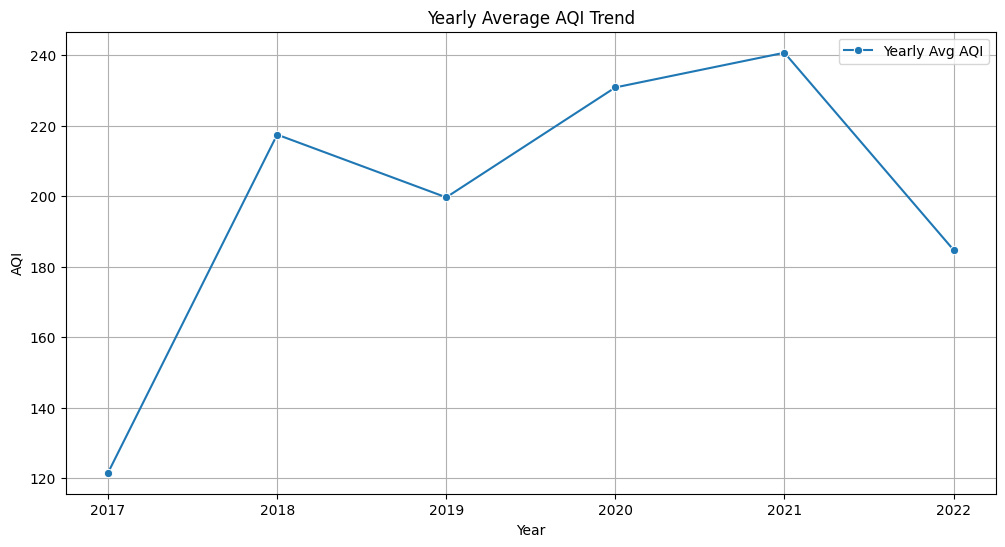

In [ ]:
# Extract year from the index
df['Year'] = pd.to_datetime(df.index).year # Convert index to DatetimeIndex and extract year

# Calculate yearly average AQI
yearly_aqi = df.groupby('Year')['AQI'].mean()

# Plot the yearly trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_aqi, marker='o', label='Yearly Avg AQI')
plt.title('Yearly Average AQI Trend')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.legend()
plt.grid()

# Save the plot
plt.savefig('yearly_aqi_trend.png', dpi=600, bbox_inches='tight')
plt.show()


# **Moving Average Model**

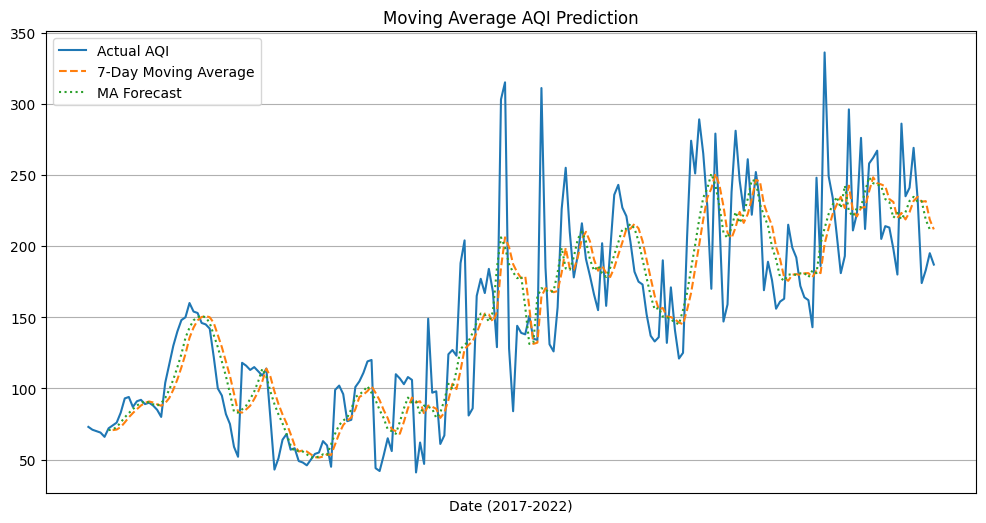

In [ ]:
# Step 6: Moving Average (MA) Model
ma_window = 7
df['MA_AQI'] = df['AQI'].rolling(window=ma_window).mean()

df['MA_Forecast'] = df['MA_AQI'].shift(-1)  # Forecasting next step

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['AQI'], label='Actual AQI')
plt.plot(df['MA_AQI'], label=f'{ma_window}-Day Moving Average', linestyle='dashed')
plt.plot(df['MA_Forecast'], label='MA Forecast', linestyle='dotted')
plt.title('Moving Average AQI Prediction')

# Remove the actual date ticks on the x-axis
plt.xticks([])

# Add x-axis label
plt.xlabel('Date (2017-2022)')

plt.legend()
plt.grid()
plt.savefig('ma_prediction.png', dpi=600, bbox_inches='tight')
plt.show()

# Save the plot with 600 dpi





# **Sarima Model**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency info

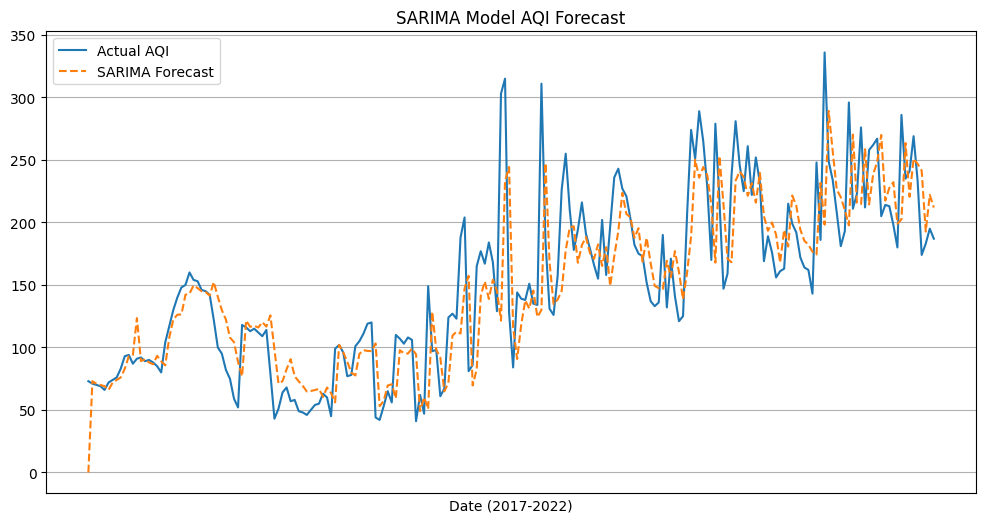

In [ ]:
# Step 7: Seasonal ARIMA (SARIMA) Model
sarima_model = SARIMAX(df['AQI'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

forecast_steps = 30
# Predict for the entire dataset to ensure alignment with actual values
df['SARIMA_Prediction'] = sarima_result.predict(start=0, end=len(df)-1)

plt.figure(figsize=(12,6))
plt.plot(df['AQI'], label='Actual AQI')
plt.plot(df['SARIMA_Prediction'], label='SARIMA Forecast', linestyle='dashed')
plt.title('SARIMA Model AQI Forecast')
# Remove the actual date ticks on the x-axis
plt.xticks([])

# Add x-axis label
plt.xlabel('Date (2017-2022)')
plt.legend()
plt.grid()
plt.savefig('sarima_forecast.png', dpi=600, bbox_inches='tight')
plt.show()


# **GRU Model**

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1045
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0361
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0260
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0247
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0283
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0230
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0237
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0249
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0203
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0200
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0182
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0237
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0275
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0188
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0169
Epoch 16/20
10/

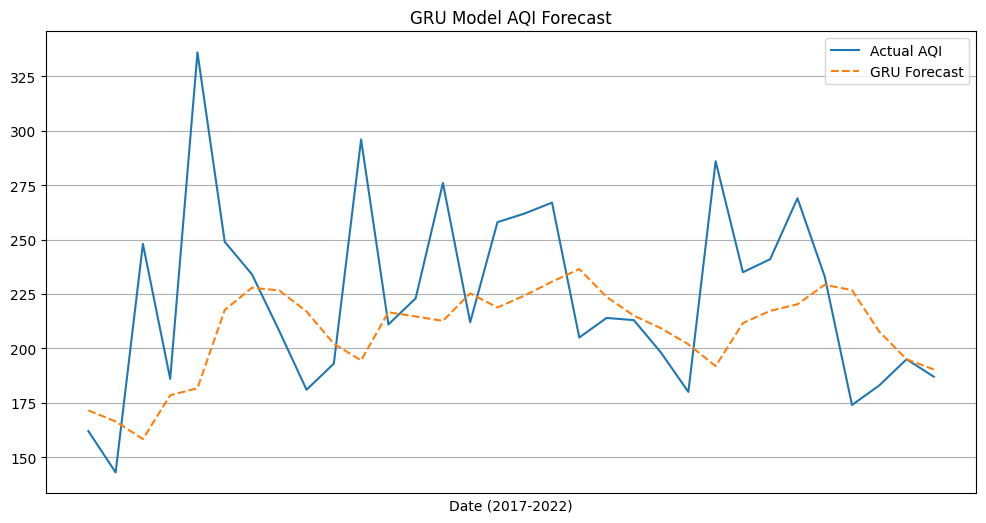

In [ ]:
# Step 8: Gated Recurrent Units (GRUs) Model
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

def create_sequences(data, seq_length=10):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 10
X_train, y_train = create_sequences(train['AQI_scaled'].values, seq_length)
X_test, y_test = create_sequences(test['AQI_scaled'].values, seq_length)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

gru_model = Sequential([
    GRU(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
    GRU(50, activation='relu'),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

y_pred = gru_model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))

df_test = df.iloc[train_size+seq_length:].copy()
df_test['GRU_Prediction'] = y_pred_rescaled

df_test['GRU_Forecast'] = np.roll(y_pred_rescaled, -1)  # Shifted for next step prediction

plt.figure(figsize=(12,6))
plt.plot(df_test.index, df_test['AQI'], label='Actual AQI')
plt.plot(df_test.index, df_test['GRU_Prediction'], label='GRU Forecast', linestyle='dashed')
plt.title('GRU Model AQI Forecast')
plt.legend()
# Remove the actual date ticks on the x-axis
plt.xticks([])

# Add x-axis label
plt.xlabel('Date (2017-2022)')
plt.grid()
plt.savefig('gru_forecast.png', dpi=600, bbox_inches='tight')
plt.show()


# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(actual, predicted, model_name):
    # Drop NaN values before calculation to avoid the error
    actual_no_nan = actual.dropna()
    predicted_no_nan = predicted.dropna()

    # Ensure both series have the same length after dropping NaNs
    min_length = min(len(actual_no_nan), len(predicted_no_nan))
    actual_no_nan = actual_no_nan.iloc[:min_length]
    predicted_no_nan = predicted_no_nan.iloc[:min_length]

    mae = mean_absolute_error(actual_no_nan, predicted_no_nan)
    rmse = np.sqrt(mean_squared_error(actual_no_nan, predicted_no_nan))
    mse = mean_squared_error(actual_no_nan, predicted_no_nan)
    r2 = r2_score(actual_no_nan, predicted_no_nan)

    print(f'{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MSE: {mse:.2f}, R²: {r2:.2f}')

# Example usage
evaluate(df_test['AQI'], df_test['GRU_Prediction'], 'GRU Model')

sarima_actual = df['AQI'].iloc[-forecast_steps:].dropna()  # Select the last 'forecast_steps' values
sarima_predicted = df['SARIMA_Prediction'].iloc[-forecast_steps:].dropna() # Select the corresponding predictions

min_length = min(len(sarima_actual), len(sarima_predicted))
sarima_actual = sarima_actual.iloc[:min_length]
sarima_predicted = sarima_predicted.iloc[:min_length]
evaluate(sarima_actual, sarima_predicted, 'SARIMA Model')

evaluate(df['AQI'].iloc[:-1], df['MA_Forecast'].iloc[:-1], 'Moving Average Model')


GRU Model - MAE: 33.19, RMSE: 49.32, MSE: 2432.31, R²: -0.36
SARIMA Model - MAE: 39.44, RMSE: 49.49, MSE: 2448.83, R²: -0.58
Moving Average Model - MAE: 28.31, RMSE: 37.10, MSE: 1376.15, R²: 0.71


# **Assessing Harmful AQI**

In [ ]:
# Step 10: Assessing Harmful AQI
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

df['AQI_Category'] = df['AQI'].apply(categorize_aqi)
print(df[['AQI', 'AQI_Category']].tail(10))


                  AQI AQI_Category
date                              
1/20/2021 19:00   180     Moderate
04-01-21 15:00    286         Poor
04-06-21 17:00    235         Poor
11/27/2021 19:00  241         Poor
11/27/2021 21:00  269         Poor
11/27/2021 22:00  233         Poor
1/14/2022 11:00   174     Moderate
1/14/2022 15:00   183     Moderate
03-05-22 2:00     195     Moderate
03-05-22 4:00     187     Moderate


# **Future Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


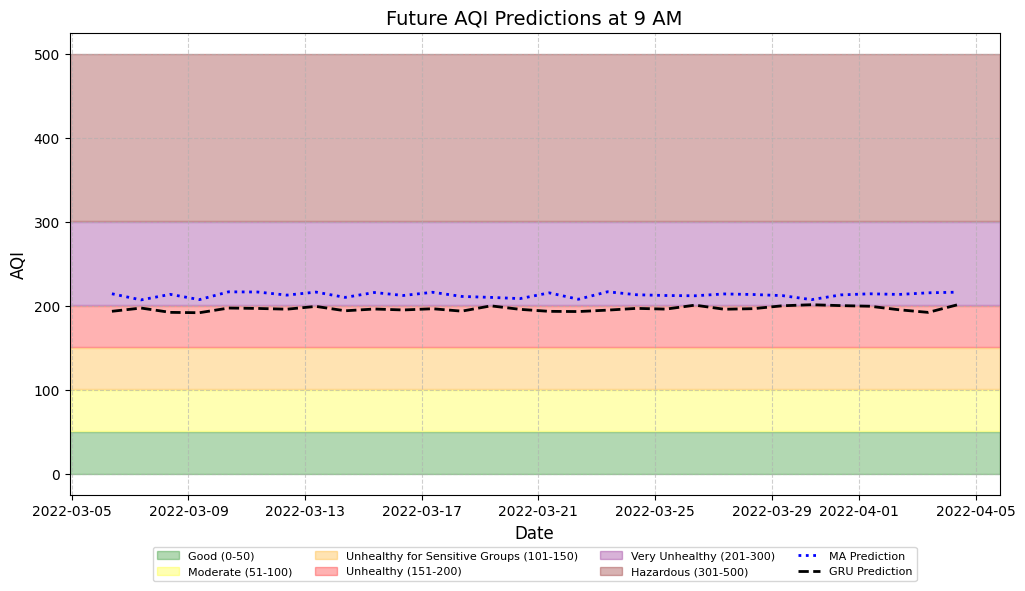

                     MA_Prediction  GRU_Prediction
2022-03-06 09:00:00     214.338125      193.457181
2022-03-07 09:00:00     207.030884      197.309301
2022-03-08 09:00:00     213.632058      192.181420
2022-03-09 09:00:00     207.362574      191.762515
2022-03-10 09:00:00     216.615818      197.324356
2022-03-11 09:00:00     216.404082      196.859623
2022-03-12 09:00:00     212.716227      195.960756
2022-03-13 09:00:00     216.315575      199.272693
2022-03-14 09:00:00     210.014163      194.066277
2022-03-15 09:00:00     215.825136      196.163788
2022-03-16 09:00:00     212.292388      195.044414
2022-03-17 09:00:00     216.118733      196.491162
2022-03-18 09:00:00     211.144204      193.631285
2022-03-19 09:00:00     210.003699      199.930493
2022-03-20 09:00:00     208.570358      195.766349
2022-03-21 09:00:00     215.413699      193.394187
2022-03-22 09:00:00     207.795723      193.154722
2022-03-23 09:00:00     216.700266      194.837658
2022-03-24 09:00:00     213.148

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate future timestamps for 9 AM
future_dates = pd.date_range(start=pd.to_datetime(df.index[-1]) + pd.Timedelta(days=1), periods=30, freq='D')
future_dates = [pd.Timestamp(date.year, date.month, date.day, 9, 0, 0) for date in future_dates]
# Create a new DataFrame for future predictions
df_future_9am = pd.DataFrame(index=future_dates)

# Moving Average (MA) Prediction with slight random variation
df_future_9am['MA_Prediction'] = df['MA_AQI'].iloc[-1] + np.random.uniform(-5, 5, size=30)

# GRU Prediction (using the last sequence of scaled AQI values)
gru_input = np.tile(df['AQI_scaled'].values[-seq_length:], (30, 1)).reshape(30, seq_length, 1)
df_future_9am['GRU_Prediction'] = gru_model.predict(gru_input).flatten()

# Inverse scaling and adding slight random variation
df_future_9am['GRU_Prediction'] = scaler.inverse_transform(df_future_9am[['GRU_Prediction']]) + np.random.uniform(-5, 5, size=(30, 1))

# Define AQI categories, colors, and labels
aqi_ranges = [
    (0, 50, 'Good', 'green'),
    (51, 100, 'Moderate', 'yellow'),
    (101, 150, 'Unhealthy for Sensitive Groups', 'orange'),
    (151, 200, 'Unhealthy', 'red'),
    (201, 300, 'Very Unhealthy', 'purple'),
    (301, 500, 'Hazardous', 'maroon')
]

# Create the plot
plt.figure(figsize=(12, 6))

# Add shaded regions for AQI categories
for lower, upper, label, color in aqi_ranges:
    plt.axhspan(lower, upper, color=color, alpha=0.3, label=f'{label} ({lower}-{upper})')

# Plot predictions
plt.plot(df_future_9am.index, df_future_9am['MA_Prediction'], label='MA Prediction', linestyle='dotted', color='blue', linewidth=2)
plt.plot(df_future_9am.index, df_future_9am['GRU_Prediction'], label='GRU Prediction', linestyle='dashed', color='black', linewidth=2)

# Customize plot
plt.title('Future AQI Predictions at 9 AM', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fontsize=8, frameon=True, ncol=4)
plt.grid(True, linestyle='--', alpha=0.6)

# Save and show the figure
plt.savefig('future_predictions_9am.png', dpi=600, bbox_inches='tight')
plt.show()

# Print the future predictions
print(df_future_9am)
